# Data Preprocessing

### Importing packages


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

## Importing dataset

In [3]:
data = pd.read_csv('E:/sai/UCE/Learn_AI/Datasets/data.csv', header = 0)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
data.shape

(205, 26)

## Univariate analysis and EDD (Extended Data Dictionary)

#### What should be observed:
    1. Observe the EDD of every variable.
    2. If any doubt about the distribution of variables, Plot the histogram. If the variables are categorical then Plot with bar chart. 
    
    At last summarize the observations. 

In [5]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

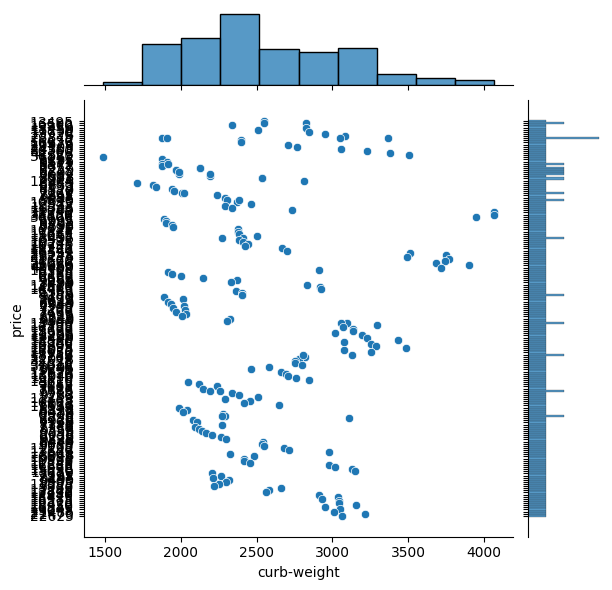

In [7]:
sns.jointplot(x="curb-weight", y="price", data=data)

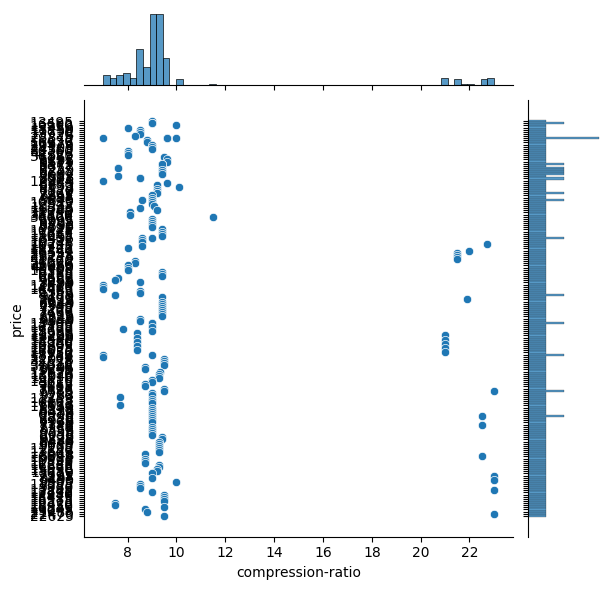

In [8]:
sns.jointplot(x="compression-ratio", y="price", data=data)

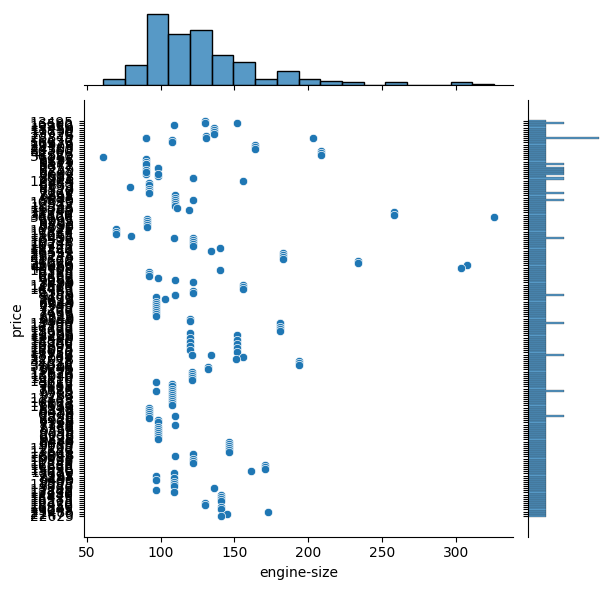

In [9]:
sns.jointplot(x="engine-size", y="price", data=data)

<Axes: xlabel='fuel-type', ylabel='count'>

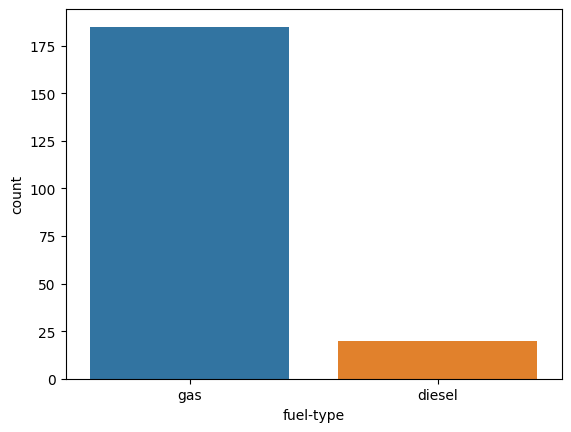

In [10]:
sns.countplot(x="fuel-type",data=data)

<Axes: xlabel='engine-location', ylabel='count'>

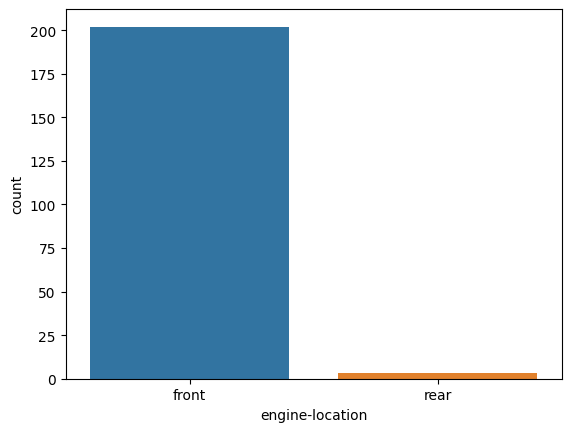

In [11]:
sns.countplot(x="engine-location",data=data)

#### Observation
    Skewness in curb-wieght, compression-ratio and engine-size
    Outliers in compression-ratio and engine-size
    Most of the engine-location values are 'front'

#### What can be extracted from Univariate analysis and EDD
    Missing values
    Skewness of the data
    Outliers
    Uneffected variables
    Nan values

## Outlier Treatment

    Outliers are the values far from the overall pattern sample

    Solution
        Detect the outliers by using the box plot, scatter plot and EDD
        Impute the Outliers

    Methods
        1.Capping and Flooring
        • Impute all the values above 3* P99 and below 0.3*P1
        • Impute with values 3* P99 and 0.3*PI
        • You can use any multiplier instead of 3, as per your business
        requirement
        2.Exponential smoothing
        • Extrapolate curve between P95 to P99 and cap all the values falling outside to the value generated by the curve
        • Similarly, extrapolate curve between P5 and PI
        3.sigma approach
        •  Identify outliers by capturing all the values falling outside mu + x * sd
        • You can use any multiplier as x, as per your business requirement

In [12]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [13]:
np.percentile(data["engine-size"],[99])

array([302.16])

In [14]:
np.percentile(data["engine-size"],[99])[0]

302.16000000000037

In [15]:
up = np.percentile(data['engine-size'],[99])[0]
up

302.16000000000037

In [16]:
eng_size = data["engine-size"]

In [17]:
data[data["engine-size"]>up]["engine-size"]

49    326
73    308
74    304
Name: engine-size, dtype: int64

In [18]:
data["engine-size"][data['engine-size']>up*3] = up*3
up*3

C:\Users\sainithin\AppData\Local\Temp\ipykernel_6844\1475096874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["engine-size"][data['engine-size']>up*3] = up*3


906.4800000000012

In [19]:
data[data["engine-size"]>up]["engine-size"]

49    326
73    308
74    304
Name: engine-size, dtype: int64

In [20]:
lp = np.percentile(data["symboling"],[1])[0]
lp

-1.96

In [21]:
data[data["symboling"]< lp]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420


In [22]:
data[data["symboling"]<lp*0.3]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
28,-1,110,dodge,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921
67,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
68,-1,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
70,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
71,-1,?,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,34184
88,-1,137,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279
123,-1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
173,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
174,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698
175,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988


In [23]:
data["symboling"][data["symboling"]<lp*0.3] = lp*0.3
data[data["symboling"]==lp*0.3]

C:\Users\sainithin\AppData\Local\Temp\ipykernel_6844\1756273068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["symboling"][data["symboling"]<lp*0.3] = lp*0.3


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
28,-0.588,110,dodge,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921
67,-0.588,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
68,-0.588,93,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
70,-0.588,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
71,-0.588,?,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.1,8.3,155,4750,16,18,34184
88,-0.588,137,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279
123,-0.588,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
173,-0.588,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
174,-0.588,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,...,110,idi,3.27,3.35,22.5,73,4500,30,33,10698
175,-0.588,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988


In [24]:
#sns.pairplot(data)

## Missing Value Imputation 

    Methods
        1. Impute with zero 
        2. Impute with median/mean(Numeric variable) and Mode(Categorical Variable)
        3. Segment based Imputation
            i. Identify sutable segments  
            ii. Calculate the mean/median/mode of the segments
            iii. Impute the missing values according to the segments
                 eg. For a rainfall variable, different cities has different values 
                 So, we make segements of cities, Impute the missing values in the dataset
            

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    float64
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [26]:
nfl1 = pd.read_csv("E:/sai/UCE/Learn_AI/Datasets/NFL1.csv")

In [27]:
nfl1 = nfl1.iloc[:1000, :20]
nfl1.to_csv("E:/sai/UCE/Learn_AI/Datasets/NFL1.csv")

In [28]:
nfl1.describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1000.000000,849.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,927.000000
mean,499.500000,499.500000,499.500000,2.009091e+09,11.96700,2.531000,1.991755,7.371000,1736.0940,21.262000,28.017000,47.737000,7.050000,25.588000,0.057000,0.288026
std,288.819436,288.819436,288.819436,1.171227e+02,7.10566,1.107369,0.994645,4.713552,1017.9538,17.170678,13.266451,25.585317,4.569944,24.318833,0.231959,0.453088
min,0.000000,0.000000,0.000000,2.009091e+09,1.00000,1.000000,1.000000,0.000000,-266.0000,0.000000,1.000000,1.000000,0.000000,-7.000000,0.000000,0.000000
25%,249.750000,249.750000,249.750000,2.009091e+09,6.00000,2.000000,1.000000,3.000000,900.0000,5.000000,19.000000,30.000000,3.000000,5.000000,0.000000,0.000000
50%,499.500000,499.500000,499.500000,2.009091e+09,11.00000,2.000000,2.000000,7.000000,1807.0000,19.000000,30.000000,48.000000,9.000000,19.000000,0.000000,0.000000
75%,749.250000,749.250000,749.250000,2.009091e+09,18.00000,3.000000,3.000000,12.000000,2578.0000,38.000000,39.000000,70.000000,10.000000,42.000000,0.000000,1.000000
max,999.000000,999.000000,999.000000,2.009091e+09,26.00000,5.000000,4.000000,15.000000,3600.0000,89.000000,50.000000,98.000000,23.000000,87.000000,1.000000,1.000000


In [29]:
nfl1["down"] = nfl1["down"].fillna(nfl1["down"].mean())

In [30]:
nfl1["down"]

0      1.991755
1      1.000000
2      2.000000
3      3.000000
4      4.000000
         ...   
995    4.000000
996    1.991755
997    1.991755
998    1.000000
999    2.000000
Name: down, Length: 1000, dtype: float64

In [31]:
nfl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  1000 non-null   int64  
 1   Unnamed: 0.1  1000 non-null   int64  
 2   Unnamed: 0    1000 non-null   int64  
 3   Date          1000 non-null   object 
 4   GameID        1000 non-null   int64  
 5   Drive         1000 non-null   int64  
 6   qtr           1000 non-null   int64  
 7   down          1000 non-null   float64
 8   time          1000 non-null   object 
 9   TimeUnder     1000 non-null   int64  
 10  TimeSecs      1000 non-null   float64
 11  PlayTimeDiff  1000 non-null   float64
 12  SideofField   1000 non-null   object 
 13  yrdln         1000 non-null   float64
 14  yrdline100    1000 non-null   float64
 15  ydstogo       1000 non-null   int64  
 16  ydsnet        1000 non-null   int64  
 17  GoalToGo      1000 non-null   float64
 18  FirstDown     927 non-null   

## Seasonality
    Seasonality refers to the variations in data for a specific intervals less than a year such as week 

    By the muliplication factor, we normalize the seasonality of the data
    To get the multiplication factor, calculate mean of population by mean/year by mean of area-effected-by-seasonality/month

## Variable Transformation and deletion


#### Bivariate Analysis
    Performing the analysis of two variables 
    To Identify the relationship, Some popular methods are
        1. Scatter Plot (Graphical way)
        2. Correlation Matrix (Tabular way)

In [56]:
data = pd.read_csv("E:/sai/UCE/Learn_AI/Machine Learning & Deep Learning in Python & R/Data Files/1. ST Academy - Crash course and Regression files/House_Price.csv")

In [57]:
data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


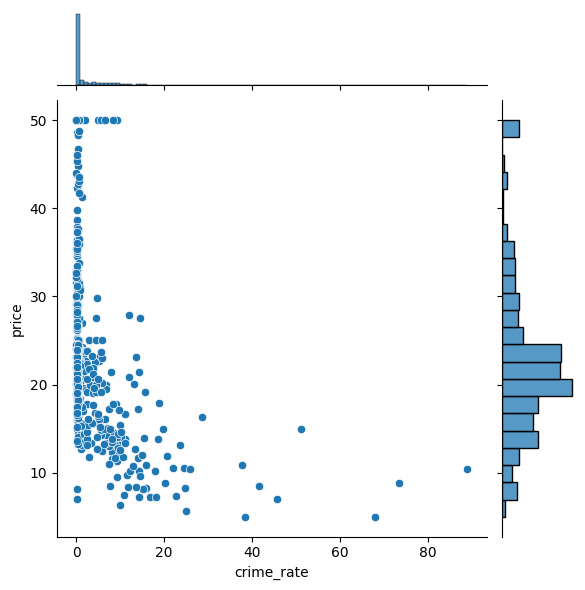

In [58]:
sns.jointplot(x='crime_rate', y='price', data=data)

In [59]:
data['crime_rate'] = np.log(1+data['crime_rate'])

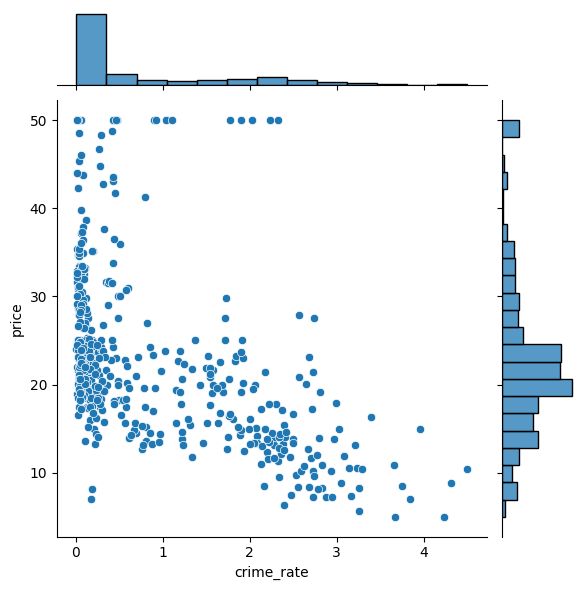

In [60]:
sns.jointplot(x='crime_rate', y='price', data=data)

In [61]:
data['crime_rate']

0      0.006300
1      0.026944
2      0.026924
3      0.031857
4      0.066770
         ...   
501    0.060747
502    0.044275
503    0.058986
504    0.103991
505    0.046320
Name: crime_rate, Length: 506, dtype: float64

In [62]:
data['total_dist'] = (data['dist1']+data['dist2']+data['dist3']+data['dist4']) /4

In [63]:
data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,total_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,12.127500


In [64]:
del data['dist1']

In [65]:
data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,total_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,12.127500


In [66]:
del data['dist2'], data['dist3'], data['dist4']

In [67]:
data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,total_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454,3.795104
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632,2.105859
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292,1.127500
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464,2.100625
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507,3.207500
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397,5.187500
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711,12.127500


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   teachers     506 non-null    float64
 7   poor_prop    506 non-null    float64
 8   airport      506 non-null    object 
 9   n_hos_beds   498 non-null    float64
 10  n_hot_rooms  506 non-null    float64
 11  waterbody    506 non-null    object 
 12  rainfall     506 non-null    int64  
 13  bus_ter      506 non-null    object 
 14  parks        506 non-null    float64
 15  total_dist   506 non-null    float64
dtypes: float64(12), int64(1), object(3)
memory usage: 63.4+ KB


In [69]:
del data['bus_ter']

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   teachers     506 non-null    float64
 7   poor_prop    506 non-null    float64
 8   airport      506 non-null    object 
 9   n_hos_beds   498 non-null    float64
 10  n_hot_rooms  506 non-null    float64
 11  waterbody    506 non-null    object 
 12  rainfall     506 non-null    int64  
 13  parks        506 non-null    float64
 14  total_dist   506 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 59.4+ KB


## Unusable Variables

    Characteristics of unsable variables
        1. Variables with single unique value
        2. Variables with low fill rate
        3. Variables with regularity issue
        4. Variables with no business sense
        

## Dummy variable
    It is also known as indicator variable 
    It is an variable to represent an attribute with two or more catgories 


### Why
    Regression analysis handle cannot handle non-numerical data

### How
    1. For n categories, Create n-1 variables
    2. New variables should contain 0 (non-occurance) and 1 (occurence) 

In [71]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,parks,total_dist
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,0.049347,4.0875
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,0.046146,4.9675
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,101.1200,None,38,0.045764,4.9675
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,0.047151,6.0650
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,0.039474,6.0625


In [72]:
data = pd.get_dummies(data)

In [73]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,total_dist,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,0,1,0,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,1,0,1,0,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,4.9675,1,0,0,0,1,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,0,1,1,0,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,1,0,1,0,0,0


As there is no significance of the airport_no variable and waterbody_None variable, Delete both the variables 

In [74]:
del data['waterbody_None'], data['airport_NO']

In [75]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,total_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,6.0625,0,1,0,0
